In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,roc_auc_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle

# NN1

In [2]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_all.pickle', 'rb') as f:  

    NN1_all = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_chief.pickle', 'rb') as f:  

    NN1_chief = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_icd.pickle', 'rb') as f:  

    NN1_icd = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_ill.pickle', 'rb') as f:  

    NN1_ill = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_medical.pickle', 'rb') as f:  

    NN1_medical = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_allergies.pickle', 'rb') as f:  

    NN1_allergies = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_family.pickle', 'rb') as f:  

    NN1_family = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN1_3final.pickle', 'rb') as f:  

    NN1_3final = pickle.load(f)

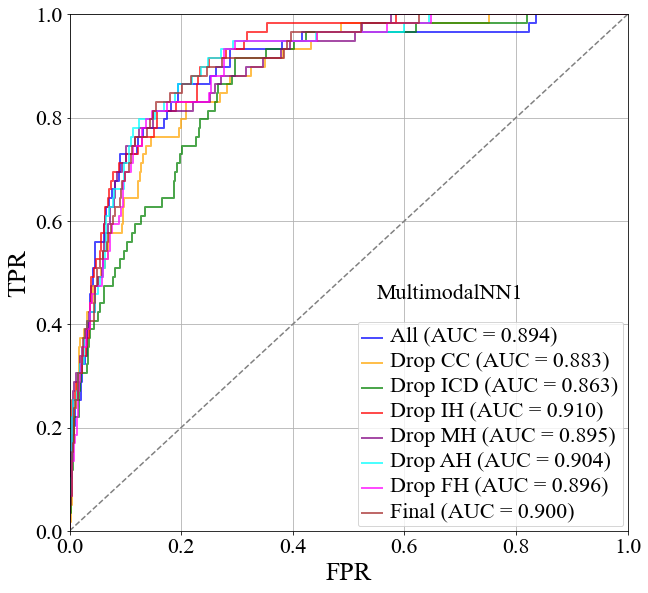

In [3]:
fpr_all, tpr_all, _ = roc_curve(NN1_all[0], NN1_all[1][:, 1])
auc_all = roc_auc_score(NN1_all[0], NN1_all[1][:, 1])

fpr_chief, tpr_chief, _ = roc_curve(NN1_chief[0], NN1_chief[1][:, 1])
auc_chief = roc_auc_score(NN1_chief[0], NN1_chief[1][:, 1])

fpr_icd, tpr_icd, _ = roc_curve(NN1_icd[0], NN1_icd[1][:, 1])
auc_icd = roc_auc_score(NN1_icd[0], NN1_icd[1][:, 1])

fpr_ill, tpr_ill, _ = roc_curve(NN1_ill[0], NN1_ill[1][:, 1])
auc_ill = roc_auc_score(NN1_ill[0], NN1_ill[1][:, 1])

fpr_medical, tpr_medical, _ = roc_curve(NN1_medical[0], NN1_medical[1][:, 1])
auc_medical = roc_auc_score(NN1_medical[0], NN1_medical[1][:, 1])

fpr_allergies, tpr_allergies, _ = roc_curve(NN1_allergies[0], NN1_allergies[1][:, 1])
auc_allergies = roc_auc_score(NN1_allergies[0], NN1_allergies[1][:, 1])

fpr_family, tpr_family, _ = roc_curve(NN1_family[0], NN1_family[1][:, 1])
auc_family = roc_auc_score(NN1_family[0], NN1_family[1][:, 1])

fpr_3final, tpr_3final, _ = roc_curve(NN1_3final[0], NN1_3final[1][:, 1])
auc_3final = roc_auc_score(NN1_3final[0], NN1_3final[1][:, 1])

plt.figure(figsize=(10, 9.5))

plt.plot(fpr_all, tpr_all, color='blue', label=f'All (AUC = {auc_all:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_chief, tpr_chief, color='orange', label=f'Drop CC (AUC = {auc_chief:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_icd, tpr_icd, color='green', label=f'Drop ICD (AUC = {auc_icd:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_ill, tpr_ill, color='red', label=f'Drop IH (AUC = {auc_ill:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_medical, tpr_medical, color='purple', label=f'Drop MH (AUC = {auc_medical:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_allergies, tpr_allergies, color='cyan', label=f'Drop AH (AUC = {auc_allergies:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_family, tpr_family, color='magenta', label=f'Drop FH (AUC = {auc_family:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_3final, tpr_3final, color='brown', label=f'Final (AUC = {auc_3final:.3f})', linewidth=2, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=26, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=26, fontname='Times New Roman')    # True Positive Rate
# plt.title('ROC Curve of 8 Models', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(22)

plt.text(0.55,0.45, 
         'MultimodalNN1', fontsize=22, fontname='Times New Roman', 
         transform=plt.gca().transAxes)    
    
plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=22, fontname='Times New Roman')
plt.yticks(fontsize=22, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2", "auc_nn1.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

# NN2

In [4]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_all.pickle', 'rb') as f:  

    NN2_all = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_chief.pickle', 'rb') as f:  

    NN2_chief = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_icd.pickle', 'rb') as f:  

    NN2_icd = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_ill.pickle', 'rb') as f:  

    NN2_ill = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_medical.pickle', 'rb') as f:  

    NN2_medical = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_allergies.pickle', 'rb') as f:  

    NN2_allergies = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_family.pickle', 'rb') as f:  

    NN2_family = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_3final.pickle', 'rb') as f:  

    NN2_3final = pickle.load(f)

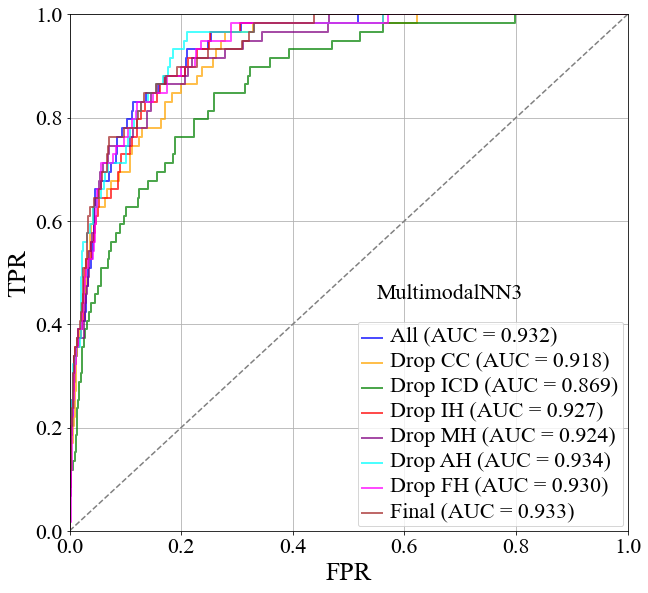

In [5]:
fpr_all, tpr_all, _ = roc_curve(NN2_all[0], NN2_all[1][:, 1])
auc_all = roc_auc_score(NN2_all[0], NN2_all[1][:, 1])

fpr_chief, tpr_chief, _ = roc_curve(NN2_chief[0], NN2_chief[1][:, 1])
auc_chief = roc_auc_score(NN2_chief[0], NN2_chief[1][:, 1])

fpr_icd, tpr_icd, _ = roc_curve(NN2_icd[0], NN2_icd[1][:, 1])
auc_icd = roc_auc_score(NN2_icd[0], NN2_icd[1][:, 1])

fpr_ill, tpr_ill, _ = roc_curve(NN2_ill[0], NN2_ill[1][:, 1])
auc_ill = roc_auc_score(NN2_ill[0], NN2_ill[1][:, 1])

fpr_medical, tpr_medical, _ = roc_curve(NN2_medical[0], NN2_medical[1][:, 1])
auc_medical = roc_auc_score(NN2_medical[0], NN2_medical[1][:, 1])

fpr_allergies, tpr_allergies, _ = roc_curve(NN2_allergies[0], NN2_allergies[1][:, 1])
auc_allergies = roc_auc_score(NN2_allergies[0], NN2_allergies[1][:, 1])

fpr_family, tpr_family, _ = roc_curve(NN2_family[0], NN2_family[1][:, 1])
auc_family = roc_auc_score(NN2_family[0], NN2_family[1][:, 1])

fpr_3final, tpr_3final, _ = roc_curve(NN2_3final[0], NN2_3final[1][:, 1])
auc_3final = roc_auc_score(NN2_3final[0], NN2_3final[1][:, 1])

plt.figure(figsize=(10, 9.5))

plt.plot(fpr_all, tpr_all, color='blue', label=f'All (AUC = {auc_all:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_chief, tpr_chief, color='orange', label=f'Drop CC (AUC = {auc_chief:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_icd, tpr_icd, color='green', label=f'Drop ICD (AUC = {auc_icd:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_ill, tpr_ill, color='red', label=f'Drop IH (AUC = {auc_ill:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_medical, tpr_medical, color='purple', label=f'Drop MH (AUC = {auc_medical:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_allergies, tpr_allergies, color='cyan', label=f'Drop AH (AUC = {auc_allergies:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_family, tpr_family, color='magenta', label=f'Drop FH (AUC = {auc_family:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_3final, tpr_3final, color='brown', label=f'Final (AUC = {auc_3final:.3f})', linewidth=2, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=26, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=26, fontname='Times New Roman')    # True Positive Rate
# plt.title('ROC Curve of 8 Models', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(22)

plt.text(0.55,0.45, 
         'MultimodalNN3', fontsize=22, fontname='Times New Roman', 
         transform=plt.gca().transAxes)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=22, fontname='Times New Roman')
plt.yticks(fontsize=22, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2", "auc_nn2.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

# NN3

In [6]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_all.pickle', 'rb') as f:  

    NN3_all = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_chief.pickle', 'rb') as f:  

    NN3_chief = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_icd.pickle', 'rb') as f:  

    NN3_icd = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_ill.pickle', 'rb') as f:  

    NN3_ill = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_medical.pickle', 'rb') as f:  

    NN3_medical = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_allergies.pickle', 'rb') as f:  

    NN3_allergies = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_family.pickle', 'rb') as f:  

    NN3_family = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN3_3final.pickle', 'rb') as f:  

    NN3_3final = pickle.load(f)

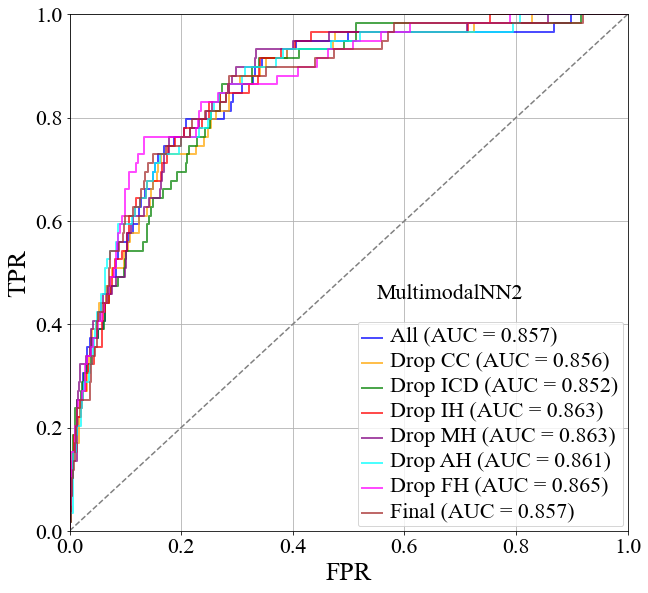

In [7]:
fpr_all, tpr_all, _ = roc_curve(NN3_all[0], NN3_all[1][:, 1])
auc_all = roc_auc_score(NN3_all[0], NN3_all[1][:, 1])

fpr_chief, tpr_chief, _ = roc_curve(NN3_chief[0], NN3_chief[1][:, 1])
auc_chief = roc_auc_score(NN3_chief[0], NN3_chief[1][:, 1])

fpr_icd, tpr_icd, _ = roc_curve(NN3_icd[0], NN3_icd[1][:, 1])
auc_icd = roc_auc_score(NN3_icd[0], NN3_icd[1][:, 1])

fpr_ill, tpr_ill, _ = roc_curve(NN3_ill[0], NN3_ill[1][:, 1])
auc_ill = roc_auc_score(NN3_ill[0], NN3_ill[1][:, 1])

fpr_medical, tpr_medical, _ = roc_curve(NN3_medical[0], NN3_medical[1][:, 1])
auc_medical = roc_auc_score(NN3_medical[0], NN3_medical[1][:, 1])

fpr_allergies, tpr_allergies, _ = roc_curve(NN3_allergies[0], NN3_allergies[1][:, 1])
auc_allergies = roc_auc_score(NN3_allergies[0], NN3_allergies[1][:, 1])

fpr_family, tpr_family, _ = roc_curve(NN3_family[0], NN3_family[1][:, 1])
auc_family = roc_auc_score(NN3_family[0], NN3_family[1][:, 1])

fpr_3final, tpr_3final, _ = roc_curve(NN3_3final[0], NN3_3final[1][:, 1])
auc_3final = roc_auc_score(NN3_3final[0], NN3_3final[1][:, 1])

plt.figure(figsize=(10, 9.5))

plt.plot(fpr_all, tpr_all, color='blue', label=f'All (AUC = {auc_all:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_chief, tpr_chief, color='orange', label=f'Drop CC (AUC = {auc_chief:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_icd, tpr_icd, color='green', label=f'Drop ICD (AUC = {auc_icd:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_ill, tpr_ill, color='red', label=f'Drop IH (AUC = {auc_ill:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_medical, tpr_medical, color='purple', label=f'Drop MH (AUC = {auc_medical:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_allergies, tpr_allergies, color='cyan', label=f'Drop AH (AUC = {auc_allergies:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_family, tpr_family, color='magenta', label=f'Drop FH (AUC = {auc_family:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_3final, tpr_3final, color='brown', label=f'Final (AUC = {auc_3final:.3f})', linewidth=2, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=26, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=26, fontname='Times New Roman')    # True Positive Rate
# plt.title('ROC Curve of 8 Models', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(22)

plt.text(0.55,0.45, 
         'MultimodalNN2', fontsize=22, fontname='Times New Roman', 
         transform=plt.gca().transAxes)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=22, fontname='Times New Roman')
plt.yticks(fontsize=22, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2", "auc_nn3.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

# NN2 + struCNN

In [8]:
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/CNN_stru.pickle', 'rb') as f:  

    CNN_stru = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_all.pickle', 'rb') as f:  

    NN2_all = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_chief.pickle', 'rb') as f:  

    NN2_chief = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_icd.pickle', 'rb') as f:  

    NN2_icd = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_ill.pickle', 'rb') as f:  

    NN2_ill = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_medical.pickle', 'rb') as f:  

    NN2_medical = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_allergies.pickle', 'rb') as f:  

    NN2_allergies = pickle.load(f)

with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_family.pickle', 'rb') as f:  

    NN2_family = pickle.load(f)
    
with open('E:/CNSI_project/demo_and_data_5.0/Processed_data/AUCpickle/NN2_3final.pickle', 'rb') as f:  

    NN2_3final = pickle.load(f)

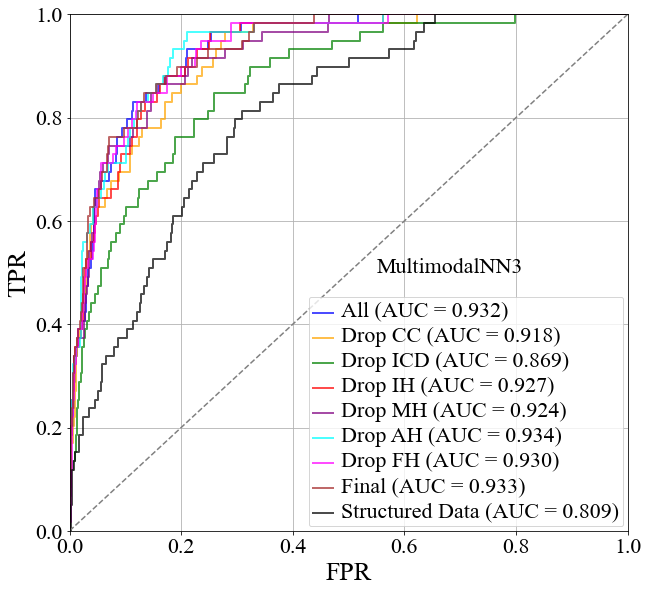

In [9]:
fpr_cnn, tpr_cnn, _ = roc_curve(CNN_stru[0], CNN_stru[1][:, 1])
auc_cnn = roc_auc_score(CNN_stru[0], CNN_stru[1][:, 1])

fpr_all, tpr_all, _ = roc_curve(NN2_all[0], NN2_all[1][:, 1])
auc_all = roc_auc_score(NN2_all[0], NN2_all[1][:, 1])

fpr_chief, tpr_chief, _ = roc_curve(NN2_chief[0], NN2_chief[1][:, 1])
auc_chief = roc_auc_score(NN2_chief[0], NN2_chief[1][:, 1])

fpr_icd, tpr_icd, _ = roc_curve(NN2_icd[0], NN2_icd[1][:, 1])
auc_icd = roc_auc_score(NN2_icd[0], NN2_icd[1][:, 1])

fpr_ill, tpr_ill, _ = roc_curve(NN2_ill[0], NN2_ill[1][:, 1])
auc_ill = roc_auc_score(NN2_ill[0], NN2_ill[1][:, 1])

fpr_medical, tpr_medical, _ = roc_curve(NN2_medical[0], NN2_medical[1][:, 1])
auc_medical = roc_auc_score(NN2_medical[0], NN2_medical[1][:, 1])

fpr_allergies, tpr_allergies, _ = roc_curve(NN2_allergies[0], NN2_allergies[1][:, 1])
auc_allergies = roc_auc_score(NN2_allergies[0], NN2_allergies[1][:, 1])

fpr_family, tpr_family, _ = roc_curve(NN2_family[0], NN2_family[1][:, 1])
auc_family = roc_auc_score(NN2_family[0], NN2_family[1][:, 1])

fpr_3final, tpr_3final, _ = roc_curve(NN2_3final[0], NN2_3final[1][:, 1])
auc_3final = roc_auc_score(NN2_3final[0], NN2_3final[1][:, 1])

plt.figure(figsize=(10, 9.5))

plt.plot(fpr_all, tpr_all, color='blue', label=f'All (AUC = {auc_all:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_chief, tpr_chief, color='orange', label=f'Drop CC (AUC = {auc_chief:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_icd, tpr_icd, color='green', label=f'Drop ICD (AUC = {auc_icd:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_ill, tpr_ill, color='red', label=f'Drop IH (AUC = {auc_ill:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_medical, tpr_medical, color='purple', label=f'Drop MH (AUC = {auc_medical:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_allergies, tpr_allergies, color='cyan', label=f'Drop AH (AUC = {auc_allergies:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_family, tpr_family, color='magenta', label=f'Drop FH (AUC = {auc_family:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_3final, tpr_3final, color='brown', label=f'Final (AUC = {auc_3final:.3f})', linewidth=2, alpha=0.7)
plt.plot(fpr_cnn, tpr_cnn, color='black', label=f'Structured Data (AUC = {auc_cnn:.3f})', linewidth=2, alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('FPR', fontsize=26, fontname='Times New Roman')  # False Positive Rate
plt.ylabel('TPR', fontsize=26, fontname='Times New Roman')    # True Positive Rate
# plt.title('ROC Curve of 8 Models', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower right')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(22)

plt.text(0.55,0.50, 
         'MultimodalNN3', fontsize=22, fontname='Times New Roman', 
         transform=plt.gca().transAxes)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=22, fontname='Times New Roman')
plt.yticks(fontsize=22, fontname='Times New Roman')

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim2", "auc_nn2_and_stru.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()